In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('movies_clean_final2.csv')
df.head(20)

,acteurs,budget,compositeur,duree,entrees_premiere_semaine,franchise,genre,pays,producteur,realisateur,remake,salles_premiere_semaine,studio,titre,scoring_acteurs,scoring_acteurs_realisateurs,season,coeff_studio,year
0,"Dany Boon, Kad Merad, Michel Galabru, Jérôme C...",12547392,NaN,106,4378720,NaN,Comédie,France,Claude Berri,Dany Boon,Remake,793,Pathé,Bienvenue chez les Ch'tis,0.275862,0.482759,Hiver,2,2008
1,"Christian Clavier, Jamel Debbouze, Gérard Depa...",50300000,NaN,107,3685097,Franchise,Comédie,France,Claude Berri,Alain Chabat,NaN,945,Pathé,Astérix et Obélix: Mission Cléopatre,1.310345,1.344828,Hiver,2,2002
2,"Ewan McGregor, Natalie Portman, Samuel L. Jackson",113000000,John Williams,146,3303005,Franchise,Fantasy,Etats-Unis,George Lucas,George Lucas,NaN,938,20th Century Fox,La Revanche des Sith,0.448276,0.448276,Printemps,3,2005
3,"Chris Evans, Chris Hemsworth, Robert Downey Jr...",356000000,Alan Silvestri,181,3426471,Franchise,Comicbook,Etats-Unis,Kevin Feige,Russo (brothers),NaN,633,Walt Disney Pictures,Avengers: Endgame,0.931034,0.931034,Printemps,3,2019
4,"Sam Worthington, Sigourney Weaver, Kate Winslet",350000000,NaN,192,2739848,Franchise,Science Fiction,Etats-Unis,NaN,James Cameron,NaN,762,Walt Disney Pictures,Avatar : la voie de l'eau,0.448276,0.724138,Hiver,3,2022
5,"Benedict Cumberbatch, Tom Holland, Willem Dafo...",200000000,NaN,148,2867515,Franchise,Comicbook,Etats-Unis,Kevin Feige,Jon Watts,NaN,882,Sony Pictures,Spider-Man: No Way Home,0.000000,0.000000,Hiver,3,2021
6,"Daniel Radcliffe, Emma Watson, Helena Bonham C...",200000000,NaN,153,2882397,Franchise,Fantasy,Etats-Unis,NaN,David Yates,NaN,949,Warner Bros.,Harry Potter et le Prince de sang-mêlé,0.482759,0.482759,Été,3,2009
7,"Orlando Bloom, Viggo Mortensen, Ian McKellen, ...",94000000,Howard Shore,201,2852784,Franchise,Fantasy,Etats-Unis,NaN,Peter Jackson,NaN,993,Metropolitan,Le Seigneur des anneaux: Le Retour du roi,1.034483,1.034483,Hiver,0,2003
8,"Richard Anconina, José Garcia, Gad Elmaleh",12560000,NaN,105,2830489,Franchise,Comédie,France,NaN,Thomas Gilou,NaN,827,Warner Bros.,La Vérité si je mens! 2,0.034483,0.034483,Hiver,3,2001
9,"Gérard Depardieu, Christian Clavier, Roberto B...",41900000,NaN,109,2718443,Franchise,Comédie,France,Claude Berri,Claude Zidi,NaN,780,Pathé,Astérix et Obélix contre César,0.517241,0.517241,Hiver,2,1999


In [16]:
df.shape

(3792, 19)

In [17]:
# Nettoyage de la colonne 'salles_premiere_semaine'
for index, value in df['salles_premiere_semaine'].items():
    if isinstance(value, str):
        value = value.replace('\r\n', '')
        value = value.replace('-', '')
        value = value.strip()
        if value:  # Vérifier si la valeur n'est pas vide après nettoyage
            df.at[index, 'salles_premiere_semaine'] = value

# Convertir en entier après nettoyage
df['salles_premiere_semaine'] = pd.to_numeric(df['salles_premiere_semaine'], errors='coerce')
df = df.dropna(subset=['salles_premiere_semaine'])
df['salles_premiere_semaine'] = df['salles_premiere_semaine'].astype(int)

In [18]:
df.dtypes

acteurs                          object
budget                            int64
compositeur                      object
duree                             int64
entrees_premiere_semaine          int64
franchise                        object
genre                            object
pays                             object
producteur                       object
realisateur                      object
remake                           object
salles_premiere_semaine           int64
studio                           object
titre                            object
scoring_acteurs                 float64
scoring_acteurs_realisateurs    float64
season                           object
coeff_studio                      int64
year                              int64
dtype: object

In [19]:
df.describe()

,budget,duree,entrees_premiere_semaine,salles_premiere_semaine,scoring_acteurs,scoring_acteurs_realisateurs,coeff_studio,year
count,3.792000e+03,3792.000000,3.792000e+03,3792.000000,3792.000000,3792.000000,3792.000000,3792.000000
mean,4.177887e+07,110.024525,3.468412e+05,342.764241,0.194693,0.218636,1.704905,2009.737342
std,5.120439e+07,18.605065,4.429903e+05,201.551543,0.244606,0.280166,1.222189,8.085934
min,0.000000e+00,0.000000,9.006000e+03,1.000000,0.000000,0.000000,0.000000,1993.000000
25%,6.161332e+06,97.000000,9.784500e+04,188.000000,0.000000,0.000000,0.000000,2003.750000
50%,2.400000e+07,107.000000,1.899580e+05,300.000000,0.103448,0.103448,2.000000,2011.000000
75%,6.000000e+07,120.000000,4.092255e+05,472.000000,0.310345,0.344828,3.000000,2016.000000
max,3.560000e+08,206.000000,4.378720e+06,1093.000000,1.689655,2.068966,3.000000,2024.000000


In [20]:
df.median(numeric_only=True)

budget                          2.400000e+07
duree                           1.070000e+02
entrees_premiere_semaine        1.899580e+05
salles_premiere_semaine         3.000000e+02
scoring_acteurs                 1.034483e-01
scoring_acteurs_realisateurs    1.034483e-01
coeff_studio                    2.000000e+00
year                            2.011000e+03
dtype: float64

In [21]:
df['salles_premiere_semaine'].unique

<bound method Series.unique of 0        793
1        945
2        938
3        633
4        762
        ... 
3787     755
3788     955
3789     783
3790     731
3791    1027
Name: salles_premiere_semaine, Length: 3792, dtype: int64>

In [22]:
df.isnull().sum()

acteurs                            0
budget                             0
compositeur                     3197
duree                              0
entrees_premiere_semaine           0
franchise                       3275
genre                              1
pays                               0
producteur                      3256
realisateur                     2033
remake                          3615
salles_premiere_semaine            0
studio                             0
titre                              0
scoring_acteurs                    0
scoring_acteurs_realisateurs       0
season                             0
coeff_studio                       0
year                               0
dtype: int64

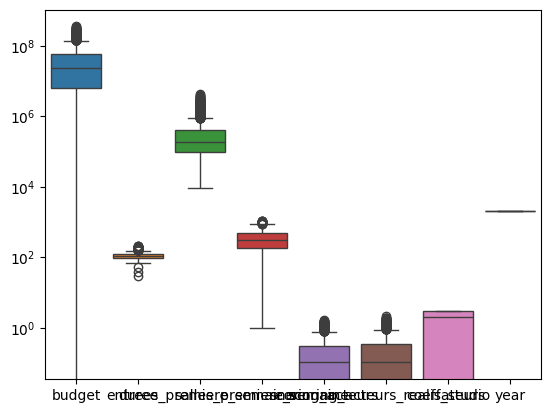

In [23]:
sns.boxplot(data=df)
plt.yscale("log")
plt.show()

In [24]:
# plt.figure(figsize=(14, 7))
# sns.countplot(data=df, x="salles_premiere_semaine", hue="entrees_premiere_semaine", palette='Purples')
# plt.ylabel("Fréquence")
# plt.show()

In [25]:
import datetime as dt 

# Assurez-vous que la colonne 'date' est au format datetime
df["date"] = pd.to_datetime(df["date"])

# Extraire l'année de la date de sortie
df["year"] = df["date"].dt.year

df = df.drop(['date'], axis=1)

# Afficher le DataFrame avec l'année de sortie
print(df)




KeyError: 'date'

KeyboardInterrupt: 

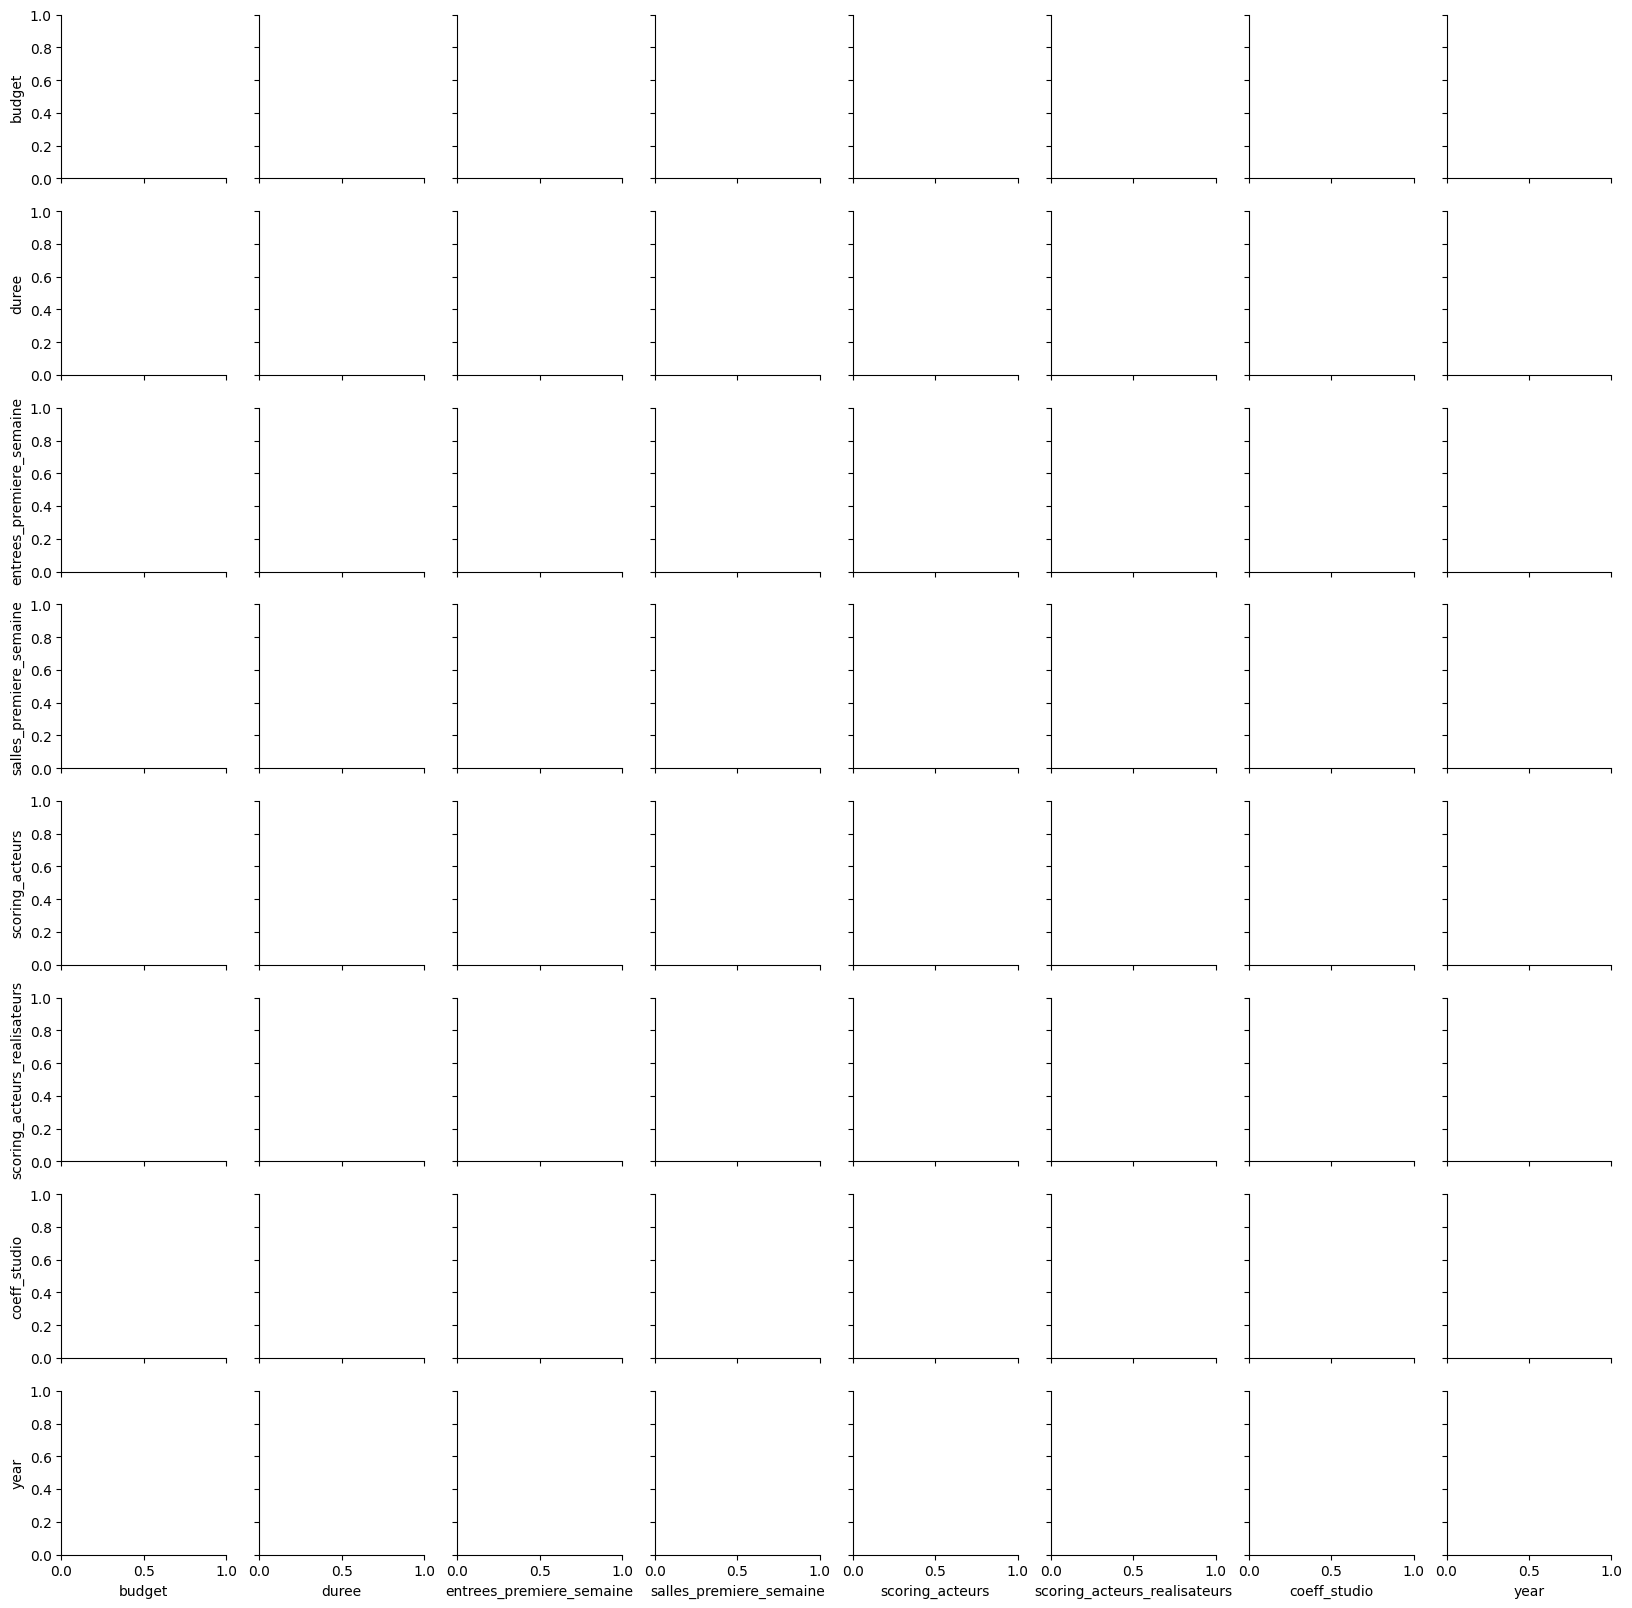

In [ ]:
sns.pairplot(df)

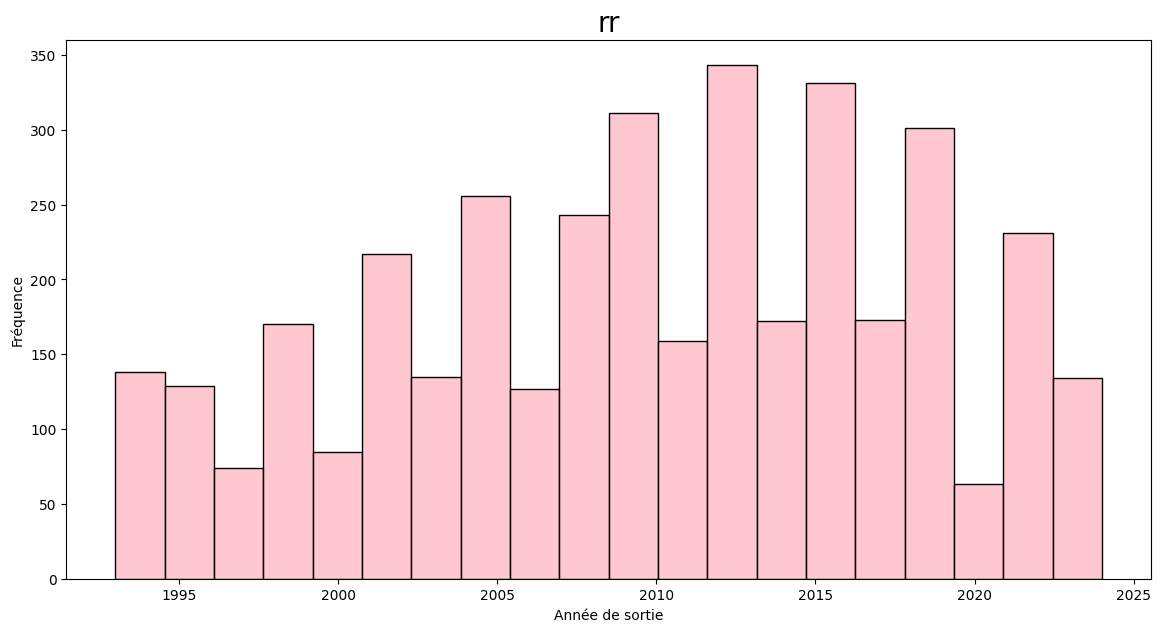

In [ ]:
plt.figure(figsize=(14,7))
plt.xlabel("Année de sortie")
plt.ylabel("Fréquence")
plt.title("rr", fontsize=20)
sns.histplot(df, x="year", color="lightpink", legend=False)
plt.show()

In [ ]:
df.to_csv('movies_clean_final2.csv', index=False)

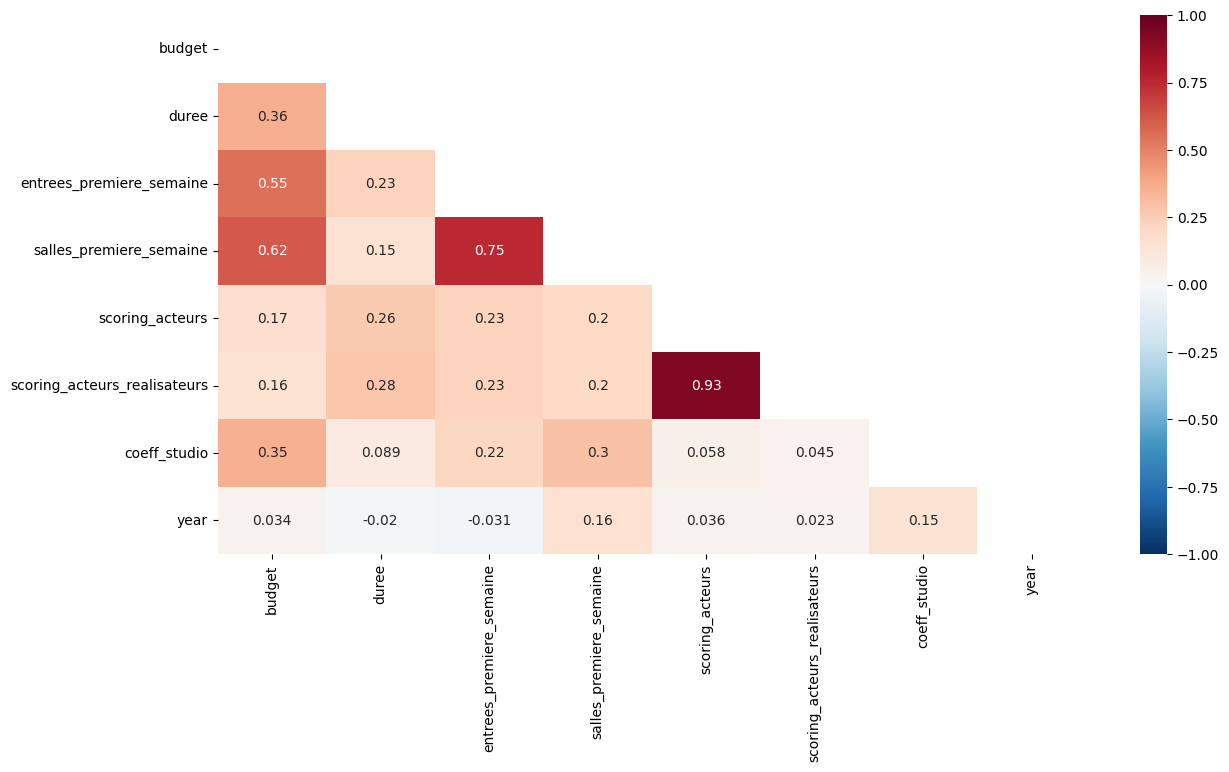

In [ ]:
#Corrélation entre toutes les colonnes
plt.figure(figsize=(14,7))
corr = df.corr(numeric_only=True)
matrix = np.triu(corr)
sns.heatmap(corr, cmap="RdBu_r", annot=True, mask=matrix, vmin=-1, center=0, vmax=1)
plt.show()#Corrélation entre toutes les colonnes
